## Model training periods impact estimation of COVID-19 incidence from wastewater viral loads

We develop and implement a mathematical framework to infer incident cases of COVID-19 from SARS-CoV-2 levels measured in wastewater. We propose a classification scheme to assess the adequacy of model training periods based on clinical testing and assess the sensitivity of model predictions to training periods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from scipy.stats import gamma
import matplotlib.dates as mdates
import datetime
from run_mcmc import mcmc_conv, Params
from save_mcmc import save_output
from plot_data import  plot_data, plot_data_test,plot_smother_comp_conc
from plot_training_set import plot_selec_training_set
from plot_comp_training_sets import comparison_conv_Tsets, comparison_linear_Tsets, plot_linear_vs_conv
plt.rcParams['font.size'] = 14

### Data

In [3]:
city = 'Davis'
workdir = "./"
data = pd.read_csv('data/data_ww_cases.csv')

In [4]:
city_data = data[data['City'] == city]
city_data = city_data[['SampleDate', 'City', 'positives_crude', 'Testing', 'NormalizedConc_crude']]
city_data = city_data.reset_index()

In [5]:
city_data.head()

,index,SampleDate,City,positives_crude,Testing,NormalizedConc_crude
0,0,2021-09-09,Davis,15.0,1983.0,0.000101
1,1,2021-09-10,Davis,3.0,2276.0,0.000000
2,2,2021-09-11,Davis,5.0,1574.0,0.000162
3,3,2021-09-12,Davis,4.0,803.0,0.000000
4,4,2021-09-13,Davis,5.0,1131.0,0.000000


### Smoothed wastewater signal
To reduce uncertainty and to minimize daily fluctuations of cases observed, we applied a 10-day moving average for daily influent WW data. We use the resulting smoothed influent WW data to correlate with smoothed cases.

#### Davis
Wastewater data (N/PMMoV) and 10-day moving average (Smoothed N/PMMoV) from December 1, 2021 to March 31, 2022.

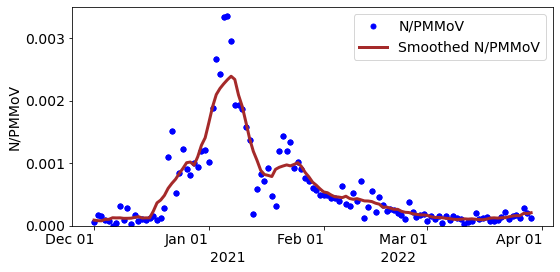

In [6]:
plot_smother_comp_conc(city, mov_ave=True, data_imput=False, save=True, workdir=workdir)

Cases, 7-day moving average smoothed cases, and
10-day moving average of smoothed WW data.

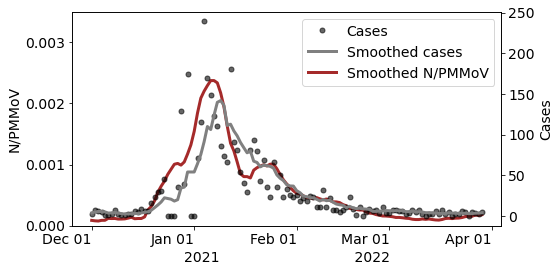

In [7]:
plot_data(city=city, save=False,workdir=workdir)

### Identification of adequate training periods
We computed the weekly rate of change in the number of tests and cases by week for the City of Davis between December 1, 2021, and March 31, 202

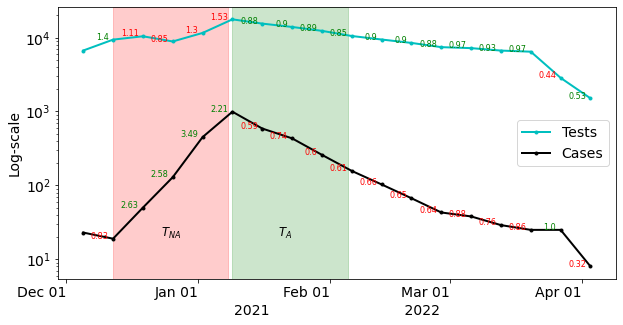

In [8]:
plot_selec_training_set(city, save=False)

# Models
We applied both a deconvolution technique and a linear regression to reconstruct incident cases of COVID-19 for Davis from the WW data, assuming model training periods according to the adequacy of clinical testing efforts.

### Initial parameters

In [9]:
Pars = Params()
m = 7 # viral shedding lenght

### Deconvolution model 
We estimate the parameters for the convolution model in the two training sets defined above.

In [10]:
# Run mcmc for the training sets displayed above
# Uncommented to run the MMC
for i in range(2):
    init_training, end_training = Pars.training_date[city][i]
    save_output(city, m, ts=i, output_name='mcmc_'+city+'_'+init_training+'-'+end_training,workdir=workdir)

pytwalk: Running the twalk with 50000 iterations .  Wed, 29 Jun 2022, 12:06:48.
       Finish in approx. 2 min and 38 sec.
pytwalk:      16384 iterations so far. Finish in approx. 1 min and 2 sec.
pytwalk: finished, Wed, 29 Jun 2022, 12:08:19.
pytwalk: Running the twalk with 50000 iterations .  Wed, 29 Jun 2022, 12:08:19.
       Finish in approx. 2 min and 3 sec.
pytwalk:      18432 iterations so far. Finish in approx. 53 sec.


/Users/marialuisa/Google Drive/UC_Postdoc/Testing_need_WWprojects/WWproject/WWcodes_papers/dec-deconvolution model/run_mcmc.py:158: RuntimeWarning: invalid value encountered in true_divide
  r = mu / (self.omega - 1.0 + self.theta_bn * mu)


pytwalk: finished, Wed, 29 Jun 2022, 12:09:43.


Following predicted cases using the estimated parameters above and WW data between December 1, 2021, and March 31, 2022. The estimated cases are displayed in green when the model was trained on the period classified as adequate ($T_A$) and in red when it was trained on the period classified as inadequate ($T_{NA}$). Solid lines represent median estimates of cases, and 95\% prediction intervals are depicted in shaded regions.

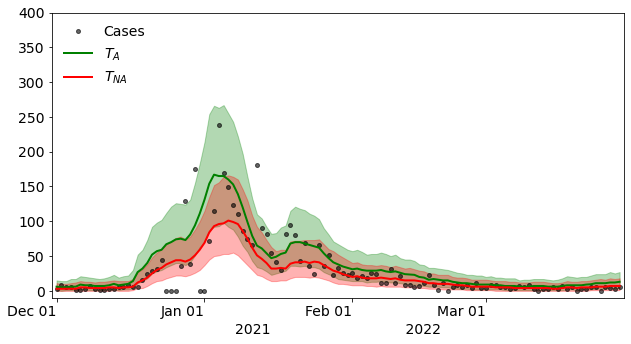

In [11]:
init_training_A, end_training_A = Pars.training_date[city][0]
init_training_NA, end_training_NA = Pars.training_date[city][1]

comparison_conv_Tsets(city, output_name_1='mcmc_'+city+'_'+init_training_A+'-'+end_training_A,
                      output_name_2='mcmc_'+city+'_'+init_training_NA+'-'+end_training_NA, workdir=workdir,save=False)

### Linear Model
Predicted cases assuming the linear regression models from WW data between December 1, 2021, and March 31, 2022. The estimated cases are displayed in blue when the model was trained on the period classified as adequate ($T_A$) and in red when it was trained on the period classified as inadequate ($T_{NA}$). Solid lines represent median estimates of cases, and 95\% prediction intervals are depicted in shaded regions.

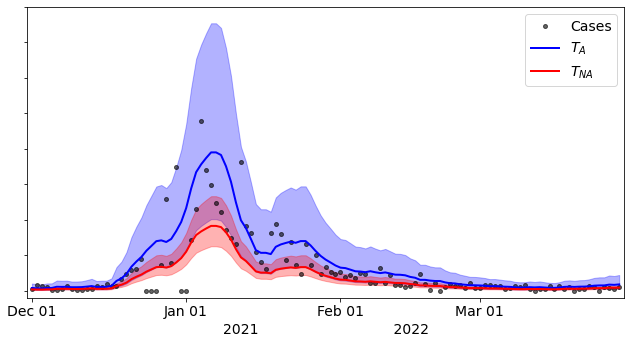

In [12]:
comparison_linear_Tsets(city, save=True)

### Deconvolution vs Linear model
Cases predicted with the linear regression model (blue) and the deconvolution model (green) using WW data between December 1, 2021, and March 31, 2022. Both models were trained in the period classified as appropriate ($T_A$). 

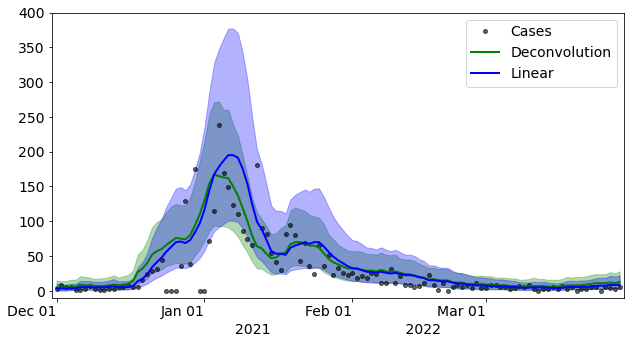

In [13]:
plot_linear_vs_conv(city=city, test_set=0, output_name='mcmc_'+city+'_'+init_training_A+'-'+end_training_A, workdir=workdir, save=False)
